# Credit card fraud detection

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
data_file = "../csv/credit_card/creditcard.csv"
dataset = pd.read_csv(data_file, index_col=0)
ds = dataset.copy()
ds

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


## EDA

In [3]:
ds[ds["Class"] != 0]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1


array([[<AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>],
       [<AxesSubplot:title={'center':'V11'}>,
        <AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>],
       [<AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>,
        <AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>],
       [<AxesSubplot:title={'center':'V21'}>,
        <AxesSubplot:title={'center':'V

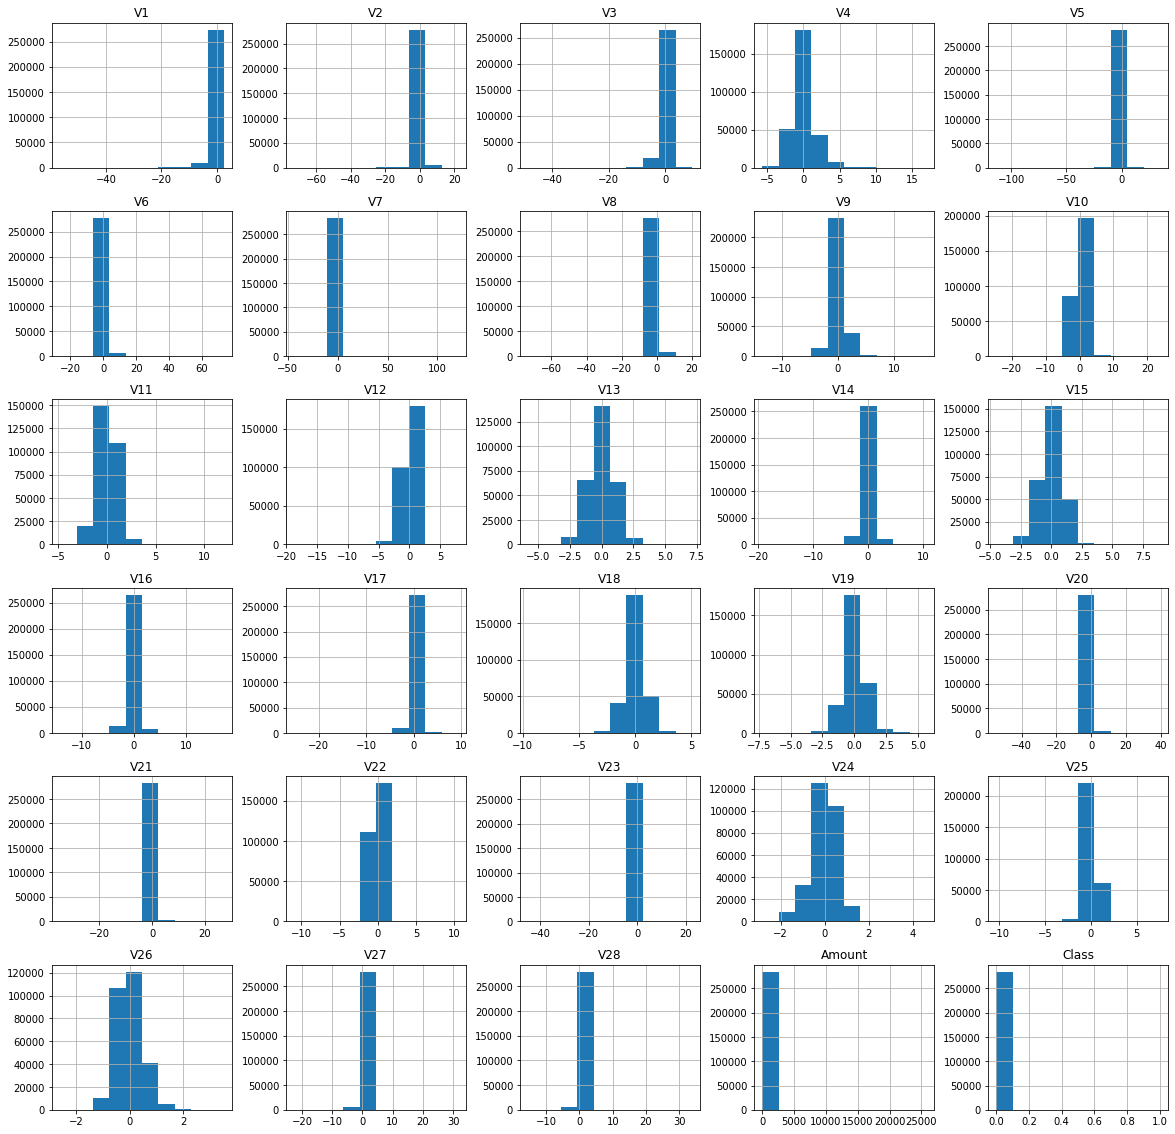

In [4]:
ds.hist(figsize=(20,20))

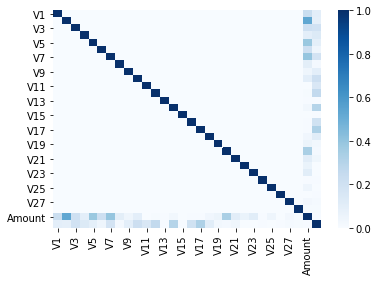

In [4]:
ax = sns.heatmap(ds.corr().abs(),cmap="Blues")

In [5]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

def getTSNE(dataset):
    scaler = StandardScaler()
    
    print("Scaling...")
    X_scaled = scaler.fit_transform(dataset)
    
    tsne = TSNE(n_components=2, random_state=42, verbose=1, n_jobs=-1)
    print("Fitting TSNE...")
    return tsne.fit_transform(X_scaled)


In [6]:
def getSample(dataset, condition, percent = 0.1):
    return dataset[condition(dataset)].sample(n=int(percent * dataset[condition(dataset)].count()[0]), random_state=42)

ds_sample_norm = getSample(dataset=ds, condition=lambda x: x["Class"] == 0)
ds_sample_out = getSample(dataset=ds, condition=lambda x: x["Class"] != 0)

ds_sample = ds_sample_norm.append(ds_sample_out)
ds_sample.shape

(28480, 30)

In [8]:
X_tsne = getTSNE(ds_sample)

Scaling...
Fitting TSNE...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 28480 samples in 0.160s...
[t-SNE] Computed neighbors for 28480 samples in 26.931s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28480
[t-SNE] Computed conditional probabilities for sample 2000 / 28480
[t-SNE] Computed conditional probabilities for sample 3000 / 28480
[t-SNE] Computed conditional probabilities for sample 4000 / 28480
[t-SNE] Computed conditional probabilities for sample 5000 / 28480
[t-SNE] Computed conditional probabilities for sample 6000 / 28480
[t-SNE] Computed conditional probabilities for sample 7000 / 28480
[t-SNE] Computed conditional probabilities for sample 8000 / 28480
[t-SNE] Computed conditional probabilities for sample 9000 / 28480
[t-SNE] Computed conditional probabilities for sample 10000 / 28480
[t-SNE] Computed conditional probabilities for sample 11000 / 28480
[t-SNE] Computed conditional probabilities for sample 12000 / 28480
[t-SNE] Computed condi

In [7]:
def showPlot(X_tsne, hue):
    plt.figure(figsize=(20,20))
    sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=hue)
    
showPlot(X_tsne, ds_sample['Class'] == 0)

NameError: name 'X_tsne' is not defined

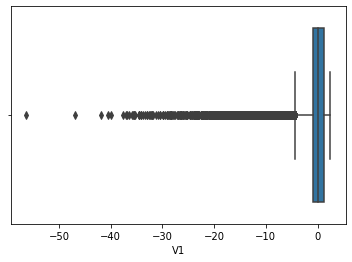

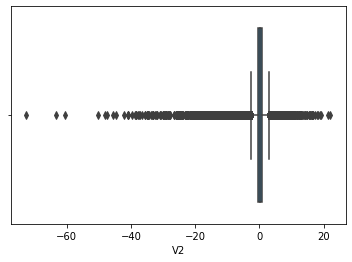

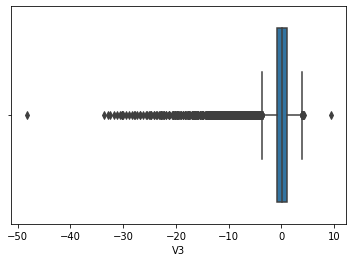

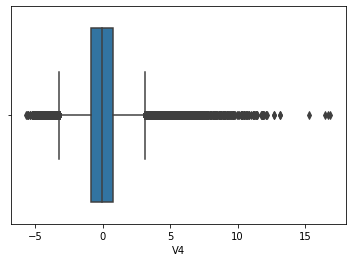

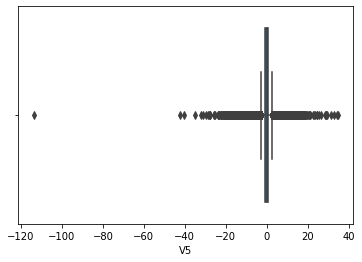

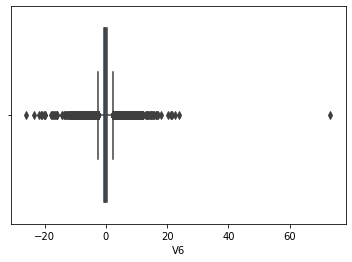

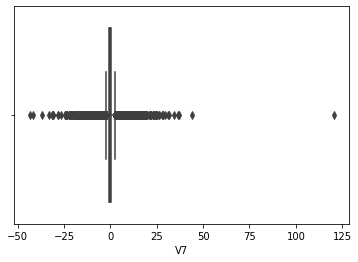

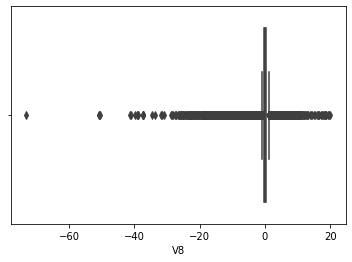

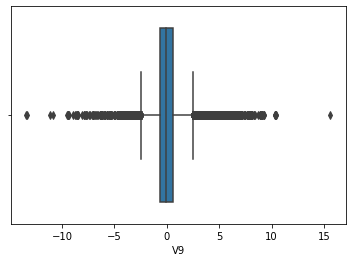

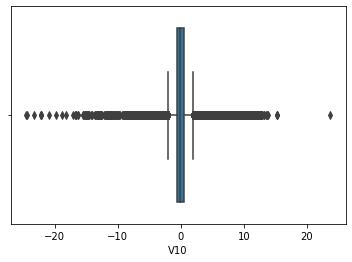

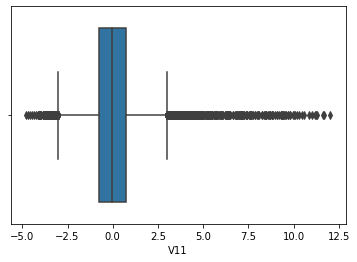

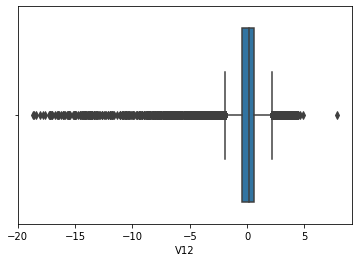

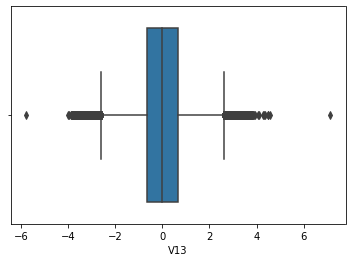

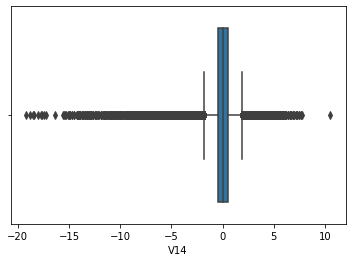

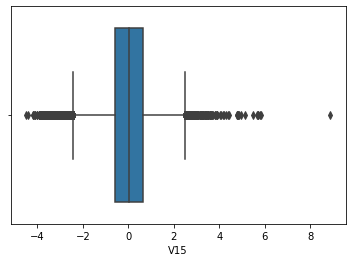

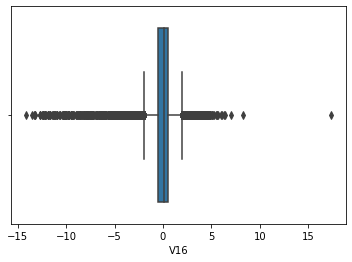

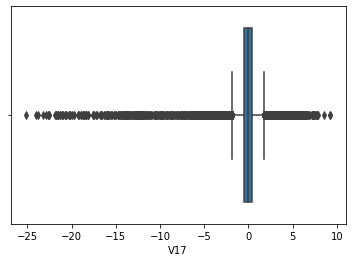

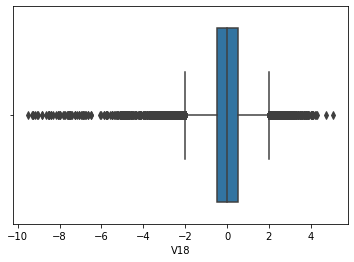

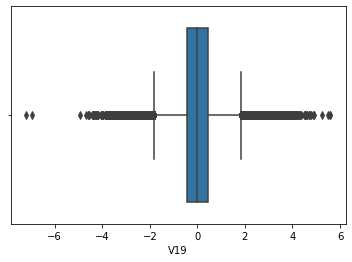

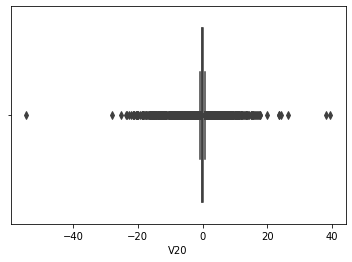

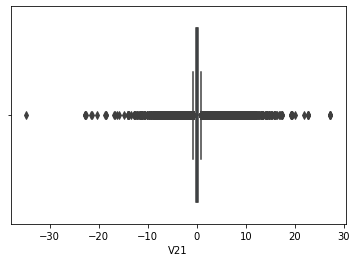

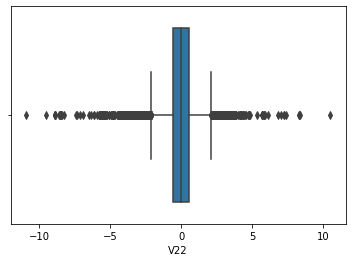

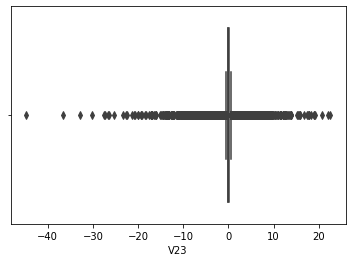

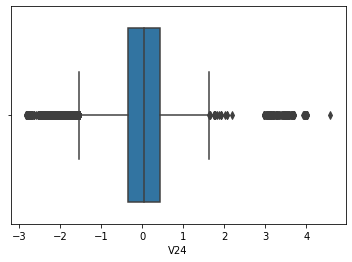

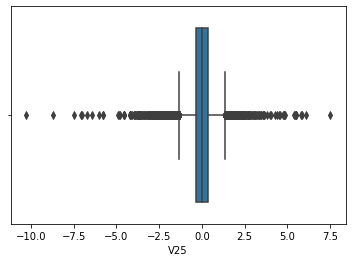

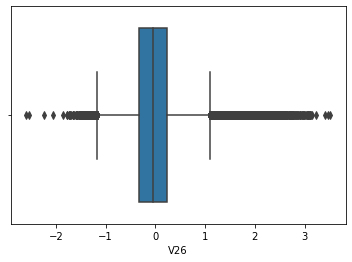

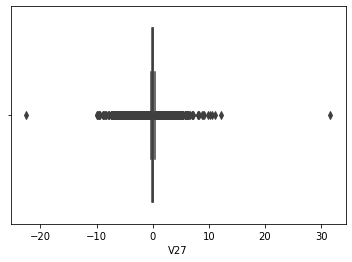

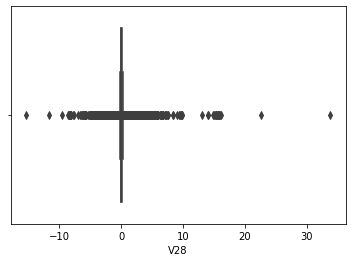

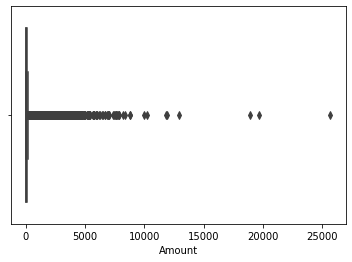

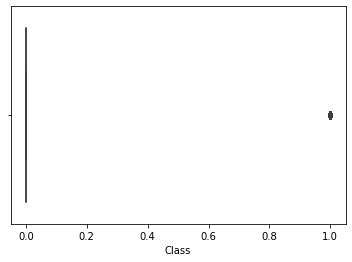

In [8]:
for col in ds.columns:
    sns.boxplot(data=ds,x=col, orient='h')
    plt.show()

In [9]:
FRAUD_PERCENT = (ds[ds['Class'] == 1].count()[0] / ds.count()[0]) * 100
FRAUD_PERCENT

0.1727485630620034

In [10]:
class_col = ds['Class']
class_col_sample = ds_sample['Class']
ds.drop(columns='Class')
ds_sample.drop(columns='Class')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,,,,,,,,,,,,,,,,,,,,,
82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,-0.597739,...,-0.058040,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76
50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,0.170547,...,-0.081298,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18
55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,2.051312,...,0.065716,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00
116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,-1.238598,...,-0.169706,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00
90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,1.166335,...,-0.282777,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46925.0,-0.481531,1.059542,0.647117,0.905586,0.819368,-0.091184,0.504135,0.161064,-0.765054,-0.550545,...,-0.042515,0.070633,0.192491,-0.174659,-0.438908,0.239259,-0.217823,-0.072852,0.010463,1.00
68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00
8528.0,0.447396,2.481954,-5.660814,4.455923,-2.443780,-2.185040,-4.716143,1.249803,-0.718326,-5.390330,...,0.549613,0.756053,0.140168,0.665411,0.131464,-1.908217,0.334808,0.748534,0.175414,1.00


In [13]:
ds_sample.shape[0]

28480

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.metrics import classification_report

In [ ]:
scaler = StandardScaler()

scaled = scaler.fit_transform(ds_sample)
db = None

for eps in tqdm(np.arange(24.2, 30, 0.005)):
    db = DBSCAN(eps=eps, n_jobs=-1,min_samples=50).fit(scaled)
    print("Eps: {}".format(eps))
    print("Num of clusters: {}".format(len(np.unique(db.labels_))))
    labels = np.array([1 if label == -1 else 0 for label in db.labels_])
    print("Percent of anomalies: {}\n".format((labels.sum() / scaled.shape[0]) * 100))
    if (labels.sum() / scaled.shape[0]) * 100 <= FRAUD_PERCENT:
        print("Found it!")
        break    

In [ ]:
db = DBSCAN(eps=24, n_jobs=-1,min_samples=50).fit(scaled)
showPlot(X_tsne, db.labels_)

In [ ]:
labels = np.array([1 if label == -1 else 0 for label in db.labels_])

In [ ]:
showPlot(X_tsne, class_col_sample)

In [ ]:
print(labels[labels == 1].sum())
print(class_col_sample[class_col_sample==1].sum())

In [ ]:
print(classification_report(y_true=class_col_sample, y_pred=labels))

### Долгим перебором был найден относительно оптимальный вариант. Попробуем его на всем датасете

In [ ]:
# Тут мы обучаемся на очень мощной машине с парой терабайт оперативной памяти

# scaler = StandardScaler()

# scaled = scaler.fit_transform(ds)
# db = DBSCAN(eps=24, min_samples=50).fit(scaled)

# labels = np.array([1 if label == -1 else 0 for label in db.labels_])

# print(classification_report(y_true=class_col, y_pred=labels))

### Кажется наш датасет слишком большой, так что обучение на всем датасете мы пропустим)

In [11]:
### Кажется наш датасет слишком большой, так что обучение на всем датасете мы пропустим)

In [35]:
scaler = StandardScaler()

scaled = scaler.fit_transform(ds_sample)
db = None

for eps in tqdm(np.arange(24.2, 30, 0.005)):
    db = DBSCAN(eps=eps, n_jobs=-1,min_samples=50).fit(scaled)
    print("Eps: {}".format(eps))
    print("Num of clusters: {}".format(len(np.unique(db.labels_))))
    labels = np.array([1 if label == -1 else 0 for label in db.labels_])
    print("Percent of anomalies: {}\n".format((labels.sum() / scaled.shape[0]) * 100))
    if (labels.sum() / scaled.shape[0]) * 100 <= FRAUD_PERCENT:
        print("Found it!")
        break    

  0%|          | 1/1161 [00:12<4:11:15, 13.00s/it]

Eps: 24.2
Num of clusters: 2
Percent of anomalies: 0.19662921348314608



  0%|          | 2/1161 [00:25<4:09:49, 12.93s/it]

Eps: 24.205
Num of clusters: 2
Percent of anomalies: 0.19662921348314608



  0%|          | 3/1161 [00:38<4:09:20, 12.92s/it]

Eps: 24.209999999999997
Num of clusters: 2
Percent of anomalies: 0.19662921348314608



  0%|          | 4/1161 [00:51<4:10:01, 12.97s/it]

Eps: 24.214999999999996
Num of clusters: 2
Percent of anomalies: 0.19662921348314608



  0%|          | 5/1161 [01:04<4:09:37, 12.96s/it]

Eps: 24.219999999999995
Num of clusters: 2
Percent of anomalies: 0.19662921348314608



  1%|          | 6/1161 [01:17<4:10:16, 13.00s/it]

Eps: 24.224999999999994
Num of clusters: 2
Percent of anomalies: 0.19662921348314608



  1%|          | 7/1161 [01:30<4:08:46, 12.93s/it]

Eps: 24.229999999999993
Num of clusters: 2
Percent of anomalies: 0.19662921348314608



  1%|          | 8/1161 [01:43<4:08:54, 12.95s/it]

Eps: 24.234999999999992
Num of clusters: 2
Percent of anomalies: 0.19662921348314608



  1%|          | 8/1161 [01:56<4:39:33, 14.55s/it]

Eps: 24.23999999999999
Num of clusters: 2
Percent of anomalies: 0.09129213483146068

Found it!


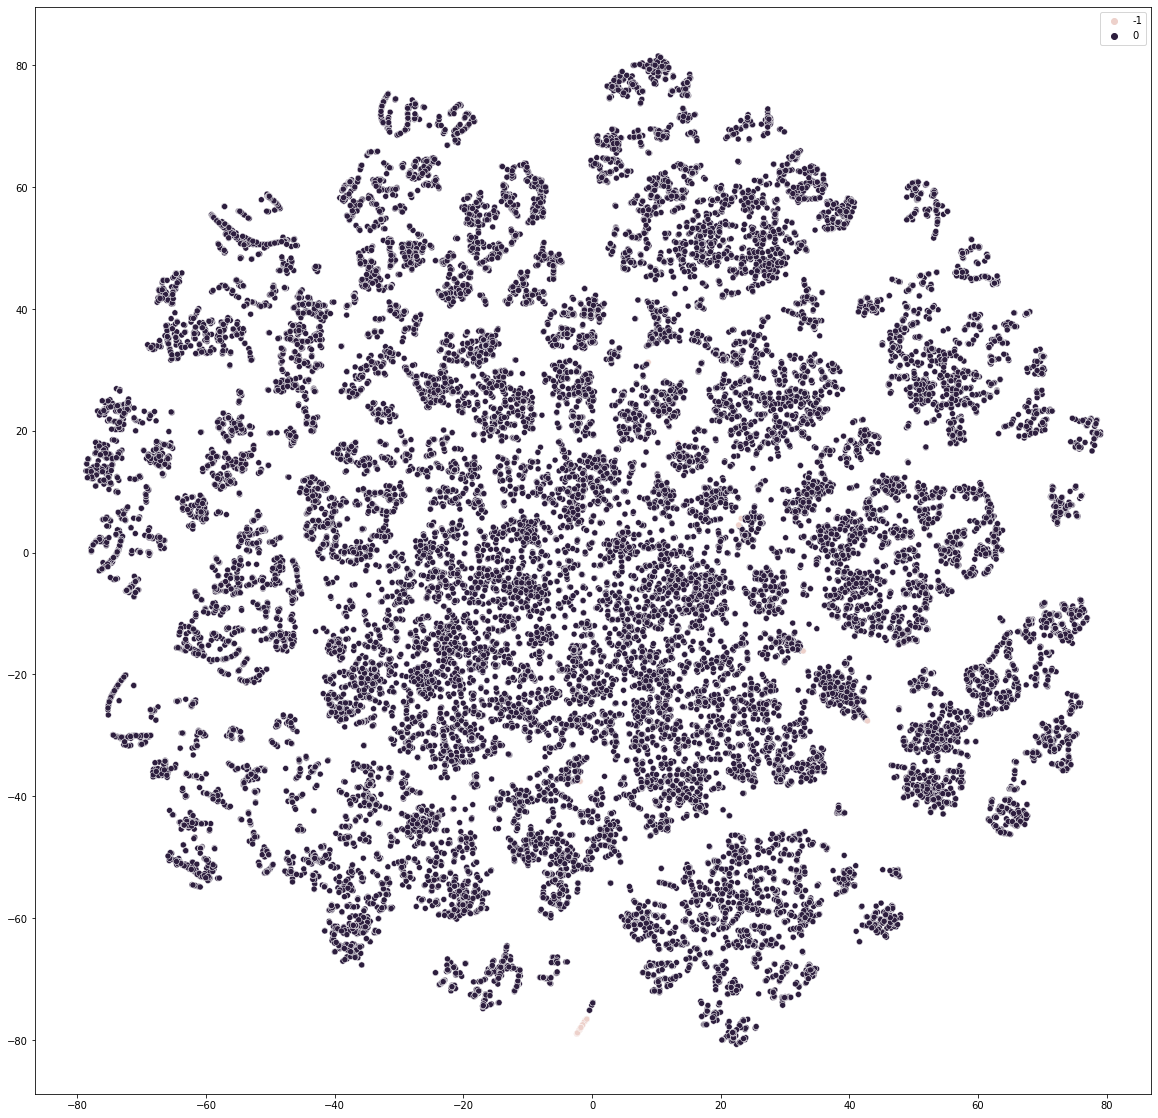

In [39]:
db = DBSCAN(eps=24, n_jobs=-1,min_samples=50).fit(scaled)
showPlot(X_tsne, db.labels_)

In [41]:
labels = np.array([1 if label == -1 else 0 for label in db.labels_])

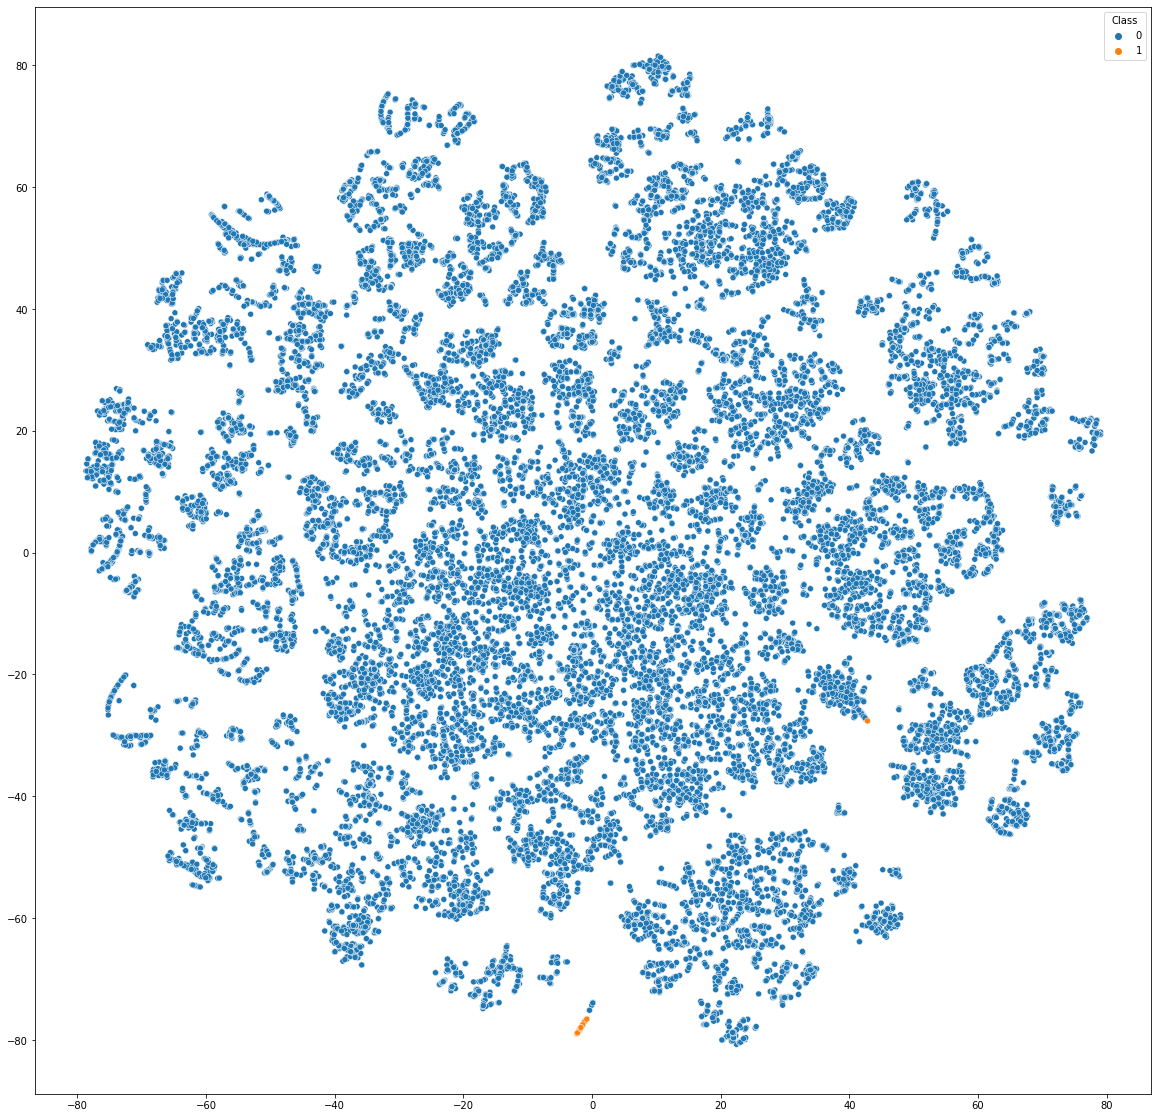

In [16]:
showPlot(X_tsne, class_col_sample)

In [42]:
print(labels[labels == 1].sum())
print(class_col_sample[class_col_sample==1].sum())

58
49


In [43]:
print(classification_report(y_true=class_col_sample, y_pred=labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.84      1.00      0.92        49

    accuracy                           1.00     28480
   macro avg       0.92      1.00      0.96     28480
weighted avg       1.00      1.00      1.00     28480



### Долгим перебором был найден относительно оптимальный вариант. Попробуем его на всем датасете

In [ ]:
# Тут мы обучаемся на очень мощной машине с парой терабайт оперативной памяти

# scaler = StandardScaler()

# scaled = scaler.fit_transform(ds)
# db = DBSCAN(eps=24, min_samples=50).fit(scaled)

# labels = np.array([1 if label == -1 else 0 for label in db.labels_])

# print(classification_report(y_true=class_col, y_pred=labels))

### Кажется наш датасет слишком большой, так что обучение на всем датасете мы пропустим)